In [2]:
import numpy as np
import pandas as pd
import tigramite
import tigramite.data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.cmiknn import CMIknn
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats


def load_ts(filename):
    X=pd.read_csv(filename)
    return np.array(X['x'])
suffix='.daily.detrend.csv'
f_nics=['gun_data/raw/background_checks_daily.np']
f_twit=['gun_data/raw/users_count_daily_proreg.np',
        'gun_data/raw/users_count_daily_antireg.np'][::-1]
#'gun_data/raw/media_violence.np',
f_med=[
            'gun_data/raw/media_regulation.np',
            'gun_data/raw/media_shootings.np',
            'gun_data/raw/media_violence.np',
           
]
        
def name_vars(v):
    return [x.split('/')[-1].replace(
            '.np','').replace('_daily','').replace(
            '_count','')
            for x in v]


vars_=f_nics+f_med+f_twit
file_names=[v+suffix for v in vars_]
data=np.array([(load_ts(fname)) for fname in file_names]).T

N=len(file_names)
var_names=name_vars(vars_)

dataframe = pp.DataFrame(data, 
                 datatime = np.arange(data.shape[0]), 
                 var_names=var_names)




In [2]:
pcmci=PCMCI( 
    dataframe=dataframe, 
    cond_ind_test=CMIknn(sig_samples=2000),verbosity=4)

In [3]:
results = pcmci.run_pcmci(tau_max=4, pc_alpha=0.05, max_conds_dim=2, max_conds_px=2)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = cmi_knn
tau_min = 1
tau_max = 4
pc_alpha = [0.05]
max_conds_dim = 2
max_combinations = 1



## Variable background_checks

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (background_checks -1) -?> background_checks (1/24):
    Subset 0: () gives pval = 0.00000 / val =  0.147
    No conditions of dimension 0 left.

    Link (background_checks -2) -?> background_checks (2/24):
    Subset 0: () gives pval = 0.00000 / val =  0.122
    No conditions of dimension 0 left.

    Link (background_checks -3) -?> background_checks (3/24):
    Subset 0: () gives pval = 0.00000 / val =  0.105
    No conditions of dimension 0 left.

    Link (background_checks -4) -?> background_checks (4/24):
    Subset 0: () gives pval = 0.00000 / val =  0.116
    No conditions of dimension 0 left.

    Link (media_regulation -1) -?> background_checks (5/

    Subset 0: (background_checks -4) (background_checks -2)  gives pval = 0.00000 / val =  0.040
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link (background_checks -4) -?> background_checks (2/12):
    Subset 0: (background_checks -1) (background_checks -2)  gives pval = 0.00000 / val =  0.028
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link (background_checks -2) -?> background_checks (3/12):
    Subset 0: (background_checks -1) (background_checks -4)  gives pval = 0.00000 / val =  0.027
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link (background_checks -3) -?> background_checks (4/12):
    Subset 0: (background_checks -1) (background_checks -4)  gives pval = 0.00000 / val =  0.018
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link (media_regulation -3) -?> background_checks (5/12):
    Subset 0: (background_checks -1) (background_checks -4)  gives pval = 0.00050 / val =  0.006
    Still subset

    Subset 0: (media_regulation -1)  gives pval = 0.00000 / val =  0.009
    No conditions of dimension 1 left.

    Link (background_checks -1) -?> media_regulation (7/20):
    Subset 0: (media_regulation -1)  gives pval = 0.00000 / val =  0.010
    No conditions of dimension 1 left.

    Link (media_shootings -1) -?> media_regulation (8/20):
    Subset 0: (media_regulation -1)  gives pval = 0.00000 / val =  0.011
    No conditions of dimension 1 left.

    Link (background_checks -4) -?> media_regulation (9/20):
    Subset 0: (media_regulation -1)  gives pval = 0.00600 / val =  0.009
    No conditions of dimension 1 left.

    Link (media_shootings -2) -?> media_regulation (10/20):
    Subset 0: (media_regulation -1)  gives pval = 0.03750 / val =  0.006
    No conditions of dimension 1 left.

    Link (media_shootings -3) -?> media_regulation (11/20):
    Subset 0: (media_regulation -1)  gives pval = 0.15350 / val =  0.005
    Non-significance detected.

    Link (media_shootings -4)

    Subset 0: () gives pval = 0.00050 / val =  0.008
    No conditions of dimension 0 left.

    Link (background_checks -2) -?> media_shootings (2/24):
    Subset 0: () gives pval = 0.00800 / val =  0.006
    No conditions of dimension 0 left.

    Link (background_checks -3) -?> media_shootings (3/24):
    Subset 0: () gives pval = 0.00000 / val =  0.012
    No conditions of dimension 0 left.

    Link (background_checks -4) -?> media_shootings (4/24):
    Subset 0: () gives pval = 0.00950 / val =  0.005
    No conditions of dimension 0 left.

    Link (media_regulation -1) -?> media_shootings (5/24):
    Subset 0: () gives pval = 0.00000 / val =  0.030
    No conditions of dimension 0 left.

    Link (media_regulation -2) -?> media_shootings (6/24):
    Subset 0: () gives pval = 0.00000 / val =  0.028
    No conditions of dimension 0 left.

    Link (media_regulation -3) -?> media_shootings (7/24):
    Subset 0: () gives pval = 0.00000 / val =  0.024
    No conditions of dimension 0

    Subset 0: (media_shootings -2) (media_shootings -3)  gives pval = 0.00000 / val =  0.036
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link (media_shootings -2) -?> media_shootings (2/12):
    Subset 0: (media_shootings -1) (media_shootings -3)  gives pval = 0.00750 / val =  0.009
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link (media_shootings -3) -?> media_shootings (3/12):
    Subset 0: (media_shootings -1) (media_shootings -2)  gives pval = 0.00000 / val =  0.007
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link (media_regulation -2) -?> media_shootings (4/12):
    Subset 0: (media_shootings -1) (media_shootings -2)  gives pval = 0.00000 / val =  0.009
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link (media_shootings -4) -?> media_shootings (5/12):
    Subset 0: (media_shootings -1) (media_shootings -2)  gives pval = 0.00000 / val =  0.008
    Still subsets of dimension 2 left, but q_max =

    Subset 0: (media_violence -4)  gives pval = 0.00000 / val =  0.016
    No conditions of dimension 1 left.

    Link (media_violence -4) -?> media_violence (2/14):
    Subset 0: (media_violence -1)  gives pval = 0.00000 / val =  0.008
    No conditions of dimension 1 left.

    Link (media_violence -3) -?> media_violence (3/14):
    Subset 0: (media_violence -1)  gives pval = 0.00000 / val =  0.008
    No conditions of dimension 1 left.

    Link (media_violence -2) -?> media_violence (4/14):
    Subset 0: (media_violence -1)  gives pval = 0.00000 / val =  0.008
    No conditions of dimension 1 left.

    Link (media_shootings -3) -?> media_violence (5/14):
    Subset 0: (media_violence -1)  gives pval = 0.00000 / val =  0.008
    No conditions of dimension 1 left.

    Link (media_regulation -1) -?> media_violence (6/14):
    Subset 0: (media_violence -1)  gives pval = 0.00150 / val =  0.005
    No conditions of dimension 1 left.

    Link (media_shootings -2) -?> media_violence (7

    Subset 0: () gives pval = 0.64900 / val =  0.001
    Non-significance detected.

    Link (users_antireg -1) -?> users_antireg (17/24):
    Subset 0: () gives pval = 0.00000 / val =  0.144
    No conditions of dimension 0 left.

    Link (users_antireg -2) -?> users_antireg (18/24):
    Subset 0: () gives pval = 0.00000 / val =  0.096
    No conditions of dimension 0 left.

    Link (users_antireg -3) -?> users_antireg (19/24):
    Subset 0: () gives pval = 0.00000 / val =  0.066
    No conditions of dimension 0 left.

    Link (users_antireg -4) -?> users_antireg (20/24):
    Subset 0: () gives pval = 0.00000 / val =  0.054
    No conditions of dimension 0 left.

    Link (users_proreg -1) -?> users_antireg (21/24):
    Subset 0: () gives pval = 0.06450 / val =  0.004
    Non-significance detected.

    Link (users_proreg -2) -?> users_antireg (22/24):
    Subset 0: () gives pval = 0.04450 / val =  0.004
    No conditions of dimension 0 left.

    Link (users_proreg -3) -?> users_

    Subset 0: () gives pval = 0.43050 / val =  0.002
    Non-significance detected.

    Link (users_antireg -2) -?> users_proreg (18/24):
    Subset 0: () gives pval = 0.13700 / val =  0.004
    Non-significance detected.

    Link (users_antireg -3) -?> users_proreg (19/24):
    Subset 0: () gives pval = 0.27000 / val =  0.003
    Non-significance detected.

    Link (users_antireg -4) -?> users_proreg (20/24):
    Subset 0: () gives pval = 0.40450 / val =  0.002
    Non-significance detected.

    Link (users_proreg -1) -?> users_proreg (21/24):
    Subset 0: () gives pval = 0.00000 / val =  0.195
    No conditions of dimension 0 left.

    Link (users_proreg -2) -?> users_proreg (22/24):
    Subset 0: () gives pval = 0.00000 / val =  0.078
    No conditions of dimension 0 left.

    Link (users_proreg -3) -?> users_proreg (23/24):
    Subset 0: () gives pval = 0.00000 / val =  0.060
    No conditions of dimension 0 left.

    Link (users_proreg -4) -?> users_proreg (24/24):
    Sub


        link (background_checks -2) -?> background_checks (2/29):
        with conds_y = [ (background_checks -1) (background_checks -4) (background_checks -3) (media_regulation -3) (media_regulation -4) (users_antireg -1) (media_regulation -1) (media_regulation -2) ]
        with conds_x = [ (background_checks -3) (background_checks -6) ]

        link (background_checks -3) -?> background_checks (3/29):
        with conds_y = [ (background_checks -1) (background_checks -4) (background_checks -2) (media_regulation -3) (media_regulation -4) (users_antireg -1) (media_regulation -1) (media_regulation -2) ]
        with conds_x = [ (background_checks -4) (background_checks -7) ]

        link (background_checks -4) -?> background_checks (4/29):
        with conds_y = [ (background_checks -1) (background_checks -2) (background_checks -3) (media_regulation -3) (media_regulation -4) (users_antireg -1) (media_regulation -1) (media_regulation -2) ]
        with conds_x = [ (background_checks 


        link (users_proreg -1) -?> background_checks (26/29):
        with conds_y = [ (background_checks -1) (background_checks -4) (background_checks -2) (background_checks -3) (media_regulation -3) (media_regulation -4) (users_antireg -1) (media_regulation -1) (media_regulation -2) ]
        with conds_x = [ (users_proreg -2) (users_proreg -3) ]

        link (users_proreg -2) -?> background_checks (27/29):
        with conds_y = [ (background_checks -1) (background_checks -4) (background_checks -2) (background_checks -3) (media_regulation -3) (media_regulation -4) (users_antireg -1) (media_regulation -1) (media_regulation -2) ]
        with conds_x = [ (users_proreg -3) (users_proreg -4) ]

        link (users_proreg -3) -?> background_checks (28/29):
        with conds_y = [ (background_checks -1) (background_checks -4) (background_checks -2) (background_checks -3) (media_regulation -3) (media_regulation -4) (users_antireg -1) (media_regulation -1) (media_regulation -2) ]
       


        link (media_violence -4) -?> media_regulation (19/29):
        with conds_y = [ (media_regulation -1) (media_regulation -2) (media_regulation -4) (media_regulation -3) (background_checks -2) (media_violence -1) (background_checks -1) (background_checks -3) (media_shootings -1) (users_proreg -1) (users_proreg -2) ]
        with conds_x = [ (media_violence -5) (media_violence -7) ]

        link (users_antireg  0) o?o media_regulation (20/29):
        with conds_y = [ (media_regulation -1) (media_regulation -2) (media_regulation -4) (media_regulation -3) (background_checks -2) (media_violence -1) (background_checks -1) (background_checks -3) (media_shootings -1) (users_proreg -1) (users_proreg -2) ]
        with conds_x = [ (users_antireg -1) (users_antireg -2) ]

        link (users_antireg -1) -?> media_regulation (21/29):
        with conds_y = [ (media_regulation -1) (media_regulation -2) (media_regulation -4) (media_regulation -3) (background_checks -2) (media_violence -1) 


        link (media_shootings -2) -?> media_shootings (12/29):
        with conds_y = [ (media_shootings -1) (media_regulation -2) (media_shootings -4) (media_regulation -1) (media_shootings -3) (media_violence -2) (media_regulation -3) (media_regulation -4) (media_violence -1) (background_checks -3) ]
        with conds_x = [ (media_shootings -3) (media_regulation -4) ]

        link (media_shootings -3) -?> media_shootings (13/29):
        with conds_y = [ (media_shootings -1) (media_regulation -2) (media_shootings -2) (media_shootings -4) (media_regulation -1) (media_violence -2) (media_regulation -3) (media_regulation -4) (media_violence -1) (background_checks -3) ]
        with conds_x = [ (media_shootings -4) (media_regulation -5) ]

        link (media_shootings -4) -?> media_shootings (14/29):
        with conds_y = [ (media_shootings -1) (media_regulation -2) (media_shootings -2) (media_regulation -1) (media_shootings -3) (media_violence -2) (media_regulation -3) (media_regul


        link (media_regulation  0) o?o media_violence (6/29):
        with conds_y = [ (media_violence -1) (media_violence -3) (media_violence -2) (media_violence -4) (media_shootings -3) ]
        with conds_x = [ (media_regulation -1) (media_regulation -2) ]

        link (media_regulation -1) -?> media_violence (7/29):
        with conds_y = [ (media_violence -1) (media_violence -3) (media_violence -2) (media_violence -4) (media_shootings -3) ]
        with conds_x = [ (media_regulation -2) (media_regulation -3) ]

        link (media_regulation -2) -?> media_violence (8/29):
        with conds_y = [ (media_violence -1) (media_violence -3) (media_violence -2) (media_violence -4) (media_shootings -3) ]
        with conds_x = [ (media_regulation -3) (media_regulation -4) ]

        link (media_regulation -3) -?> media_violence (9/29):
        with conds_y = [ (media_violence -1) (media_violence -3) (media_violence -2) (media_violence -4) (media_shootings -3) ]
        with conds_x = 


        link (media_regulation -3) -?> users_antireg (9/29):
        with conds_y = [ (users_antireg -1) (users_antireg -2) (users_antireg -3) (users_antireg -4) (users_proreg -3) (users_proreg -2) ]
        with conds_x = [ (media_regulation -4) (media_regulation -5) ]

        link (media_regulation -4) -?> users_antireg (10/29):
        with conds_y = [ (users_antireg -1) (users_antireg -2) (users_antireg -3) (users_antireg -4) (users_proreg -3) (users_proreg -2) ]
        with conds_x = [ (media_regulation -5) (media_regulation -6) ]

        link (media_shootings  0) o?o users_antireg (11/29):
        with conds_y = [ (users_antireg -1) (users_antireg -2) (users_antireg -3) (users_antireg -4) (users_proreg -3) (users_proreg -2) ]
        with conds_x = [ (media_shootings -1) (media_regulation -2) ]

        link (media_shootings -1) -?> users_antireg (12/29):
        with conds_y = [ (users_antireg -1) (users_antireg -2) (users_antireg -3) (users_antireg -4) (users_proreg -3) (us


        link (media_shootings  0) o?o users_proreg (11/29):
        with conds_y = [ (users_proreg -1) (users_proreg -2) (users_proreg -3) (media_regulation -4) (media_regulation -1) (media_regulation -3) ]
        with conds_x = [ (media_shootings -1) (media_regulation -2) ]

        link (media_shootings -1) -?> users_proreg (12/29):
        with conds_y = [ (users_proreg -1) (users_proreg -2) (users_proreg -3) (media_regulation -4) (media_regulation -1) (media_regulation -3) ]
        with conds_x = [ (media_shootings -2) (media_regulation -3) ]

        link (media_shootings -2) -?> users_proreg (13/29):
        with conds_y = [ (users_proreg -1) (users_proreg -2) (users_proreg -3) (media_regulation -4) (media_regulation -1) (media_regulation -3) ]
        with conds_x = [ (media_shootings -3) (media_regulation -4) ]

        link (media_shootings -3) -?> users_proreg (14/29):
        with conds_y = [ (users_proreg -1) (users_proreg -2) (users_proreg -3) (media_regulation -4) (med

In [4]:
pcmci.print_significant_links(
    p_matrix = results['p_matrix'],
    val_matrix = results['val_matrix'],
    alpha_level = 0.05)


## Significant links at alpha = 0.05:

    Variable background_checks has 4 link(s):
        (background_checks -1): pval = 0.00000 | val =  0.017
        (background_checks -2): pval = 0.00000 | val =  0.011
        (background_checks -3): pval = 0.00700 | val =  0.005
        (users_antireg -1): pval = 0.00600 | val =  0.003

    Variable media_regulation has 11 link(s):
        (media_regulation -1): pval = 0.00000 | val =  0.019
        (media_regulation -2): pval = 0.00000 | val =  0.008
        (media_regulation -3): pval = 0.00000 | val =  0.004
        (media_shootings -1): pval = 0.00000 | val =  0.003
        (media_shootings  0): pval = 0.03900 | val =  0.003
        (media_violence -1): pval = 0.00250 | val =  0.003
        (users_proreg -1): pval = 0.00050 | val =  0.002
        (media_violence -2): pval = 0.01200 | val =  0.002
        (background_checks -2): pval = 0.00600 | val =  0.002
        (background_checks -1): pval = 0.01050 | val =  0.002
        (media_violen

# Instructions

Consider the function:
```{python}
pcmci.print_significant_links
```
This function does some weird things with the `p` values. Use the output that prints at the end of `pcmci.run_pcmci`.

Here is an example:

```
## Significant links at alpha = 0.05:

    Variable background_checks has 4 link(s):
        (background_checks -1): pval = 0.00000 | val =  0.017
        (background_checks -2): pval = 0.00000 | val =  0.011
        (background_checks -3): pval = 0.00700 | val =  0.005
        (users_antireg -1): pval = 0.00600 | val =  0.003
```

Remove the links from each variable to itself and any unorientable links. Then the `-` sign is telling you that `background_checks` is the sink and `user_antireg` is the source. So, there is a link from anti-reg to background-checks.

```        
 ## Significant links at alpha = 0.05:

    Variable background_checks has 5 link(s):
        (users_antireg -1): pval = 0.04250 | val =  0.003       <-m              

    Variable media_regulation has 13 link(s):
        (media_shootings -1): pval = 0.00000 | val =  0.003     <-i
        (background_checks  0): pval = 0.05900 | val =  0.003  
        (media_violence -1): pval = 0.00250 | val =  0.003      <-e   
        (media_violence -2): pval = 0.00700 | val =  0.002      <-f
        (background_checks -2): pval = 0.00750 | val =  0.002   <-a
        (users_proreg -1): pval = 0.00500 | val =  0.002        <-c
        (background_checks -1): pval = 0.04550 | val =  0.002   <-b
        (media_violence -3): pval = 0.03950 | val =  0.002      <-g

    Variable media_shootings has 7 link(s):
        (media_violence -2): pval = 0.00050 | val =  0.004      <-h

    Variable media_violence has 7 link(s):
        (users_antireg -4): pval = 0.04150 | val =  0.002       <-l
        (users_proreg -4): pval = 0.04150 | val =  0.002        <-d

    Variable users_antireg has 5 link(s):
        (media_violence -4): pval = 0.00700 | val =  0.003      <-k

    Variable users_proreg has 4 link(s):
        (media_violence -2): pval = 0.00150 | val =  0.003      <-j
 ```
 
        
| Letter  | Source               | Sink                 | P-value  | Value | Corr  |  lag |
|---------|----------------------|----------------------|----------|-------|-------|------|
| a       |  background checks   |  media-regulations   |   0.006  | 0.002 |  0.311|  2   |
| b       |  background checks   |  media-regulations   |   0.0105 | 0.002 |  0.289|  1   | 
| c       |  pro-reg             |  media-regulations   |   0.0005 | 0.002 |  0.032|  1   |
| d       |  pro-reg             |  media-violent crime |   0.0415 | 0.002 |  0.02 |  4   |
| e       |  media-violent crime |  media-regulations   |   0.0025 | 0.003 |  0.208|  1   |
| f       |  media-violent crime |  media-regulations   |   0.007  | 0.002 |  0.213|  2   |
| g       |  media-violent crime |  media-regulations   |   0.0395 | 0.002 |  0.187|  3   |
| h       |  media-violent crime |  media-shootings     |   0.0005 | 0.004 |  0.254|  2   |
| i       |  media-shootings     |  media-regulations   |   0.0000 | 0.003 |  0.371|  1   |
| j       |  media-violent crime |  pro-reg             |   0.0015 | 0.003 |  0.013|  2   |
| k       |  media-violent crime |  anti-reg            |   0.0070 | 0.003 | -0.011|  4   |
| l       |  anit-reg            |  media-violent crime |   0.0414 | 0.002 |  0.004|  4   |
| m       |  anit-reg            |  background checks   |   0.0060 | 0.003 |  0.027|  1   |

In [69]:
import pandas as pd

df = pd.DataFrame(data, columns=var_names)
df.corr()

,background_checks,media_regulation,media_shootings,media_violence,users_antireg,users_proreg
background_checks,1.000000,0.297020,0.136089,0.096802,0.022178,0.048018
media_regulation,0.297020,1.000000,0.357641,0.176665,0.020741,0.032463
media_shootings,0.136089,0.357641,1.000000,0.190494,-0.008080,0.008148
media_violence,0.096802,0.176665,0.190494,1.000000,-0.016102,0.015511
users_antireg,0.022178,0.020741,-0.008080,-0.016102,1.000000,-0.031386
users_proreg,0.048018,0.032463,0.008148,0.015511,-0.031386,1.000000


In [92]:
links = [
    ('a', 'background_checks', 'media_regulation',  2),
    ('b', 'background_checks', 'media_regulation', 1),
    ('c', 'users_proreg', 'media_regulation', 1),
    ('d', 'users_proreg', 'media_violence',  4),
    ('e', 'media_violence', 'media_regulation',  1),
    ('f', 'media_violence', 'media_regulation',  2),
    ('g', 'media_violence', 'media_regulation',  3),
    ('h', 'media_violence', 'media_shootings',  2),
    ('i', 'media_shootings', 'media_regulation', 1),
    ('j', 'media_violence', 'users_proreg', 2),
    ('k', 'media_violence', 'users_antireg', 4),
    ('l', 'users_antireg', 'media_violence', 4),
    ('m', 'users_antireg', 'background_checks', 1)
]
for link_id, source, sink, lag in links:
    x = df[source].tolist()
    y = df[sink].tolist()
    n = len(x)
    m = len(y)
    x = x[0:n-lag]
    y = y[lag:m]
    res = stats.pearsonr(x, y)
    #print(f"{link_id}: {source} to {sink} lag = {lag} corr = {res.statistic} pvalue= {res.pvalue}")
    print(f"{link_id}: {source} to {sink} lag = {lag} corr = {c}")

a: background_checks to media_regulation lag = 2 corr = 0.311 pvalue= 0.0
b: background_checks to media_regulation lag = 1 corr = 0.298 pvalue= 0.0
c: users_proreg to media_regulation lag = 1 corr = 0.032 pvalue= 0.084
d: users_proreg to media_violence lag = 4 corr = 0.02 pvalue= 0.288
e: media_violence to media_regulation lag = 1 corr = 0.208 pvalue= 0.0
f: media_violence to media_regulation lag = 2 corr = 0.213 pvalue= 0.0
g: media_violence to media_regulation lag = 3 corr = 0.187 pvalue= 0.0
h: media_violence to media_shootings lag = 2 corr = 0.254 pvalue= 0.0
i: media_shootings to media_regulation lag = 1 corr = 0.371 pvalue= 0.0
j: media_violence to users_proreg lag = 2 corr = 0.013 pvalue= 0.486
k: media_violence to users_antireg lag = 4 corr = -0.011 pvalue= 0.562
l: users_antireg to media_violence lag = 4 corr = 0.004 pvalue= 0.837
m: users_antireg to background_checks lag = 1 corr = 0.027 pvalue= 0.151


In [87]:
# Reproduce the previous calculation for the time series with one lag
from scipy import stats

x = df['users_antireg'].tolist()[0:2921]
y = df['background_checks'].tolist()[1:2922]
res = stats.pearsonr(x, y)
res

PearsonRResult(statistic=0.026605083105853026, pvalue=0.15056328994385665)

In [93]:
var_names

['background_checks',
 'media_regulation',
 'media_shootings',
 'media_violence',
 'users_antireg',
 'users_proreg']

In [98]:
x = df['media_shootings'].tolist()
y = df['media_violence'].tolist()
res = stats.pearsonr(x, y)
round(res[0], 3), round(res[1], 3)

(0.19, 0.0)

In [95]:
x = df['media_shootings'].tolist()
y = df['media_regulation'].tolist()
res = stats.pearsonr(x, y)
res

PearsonRResult(statistic=0.35764062227327204, pvalue=6.86405290203011e-89)

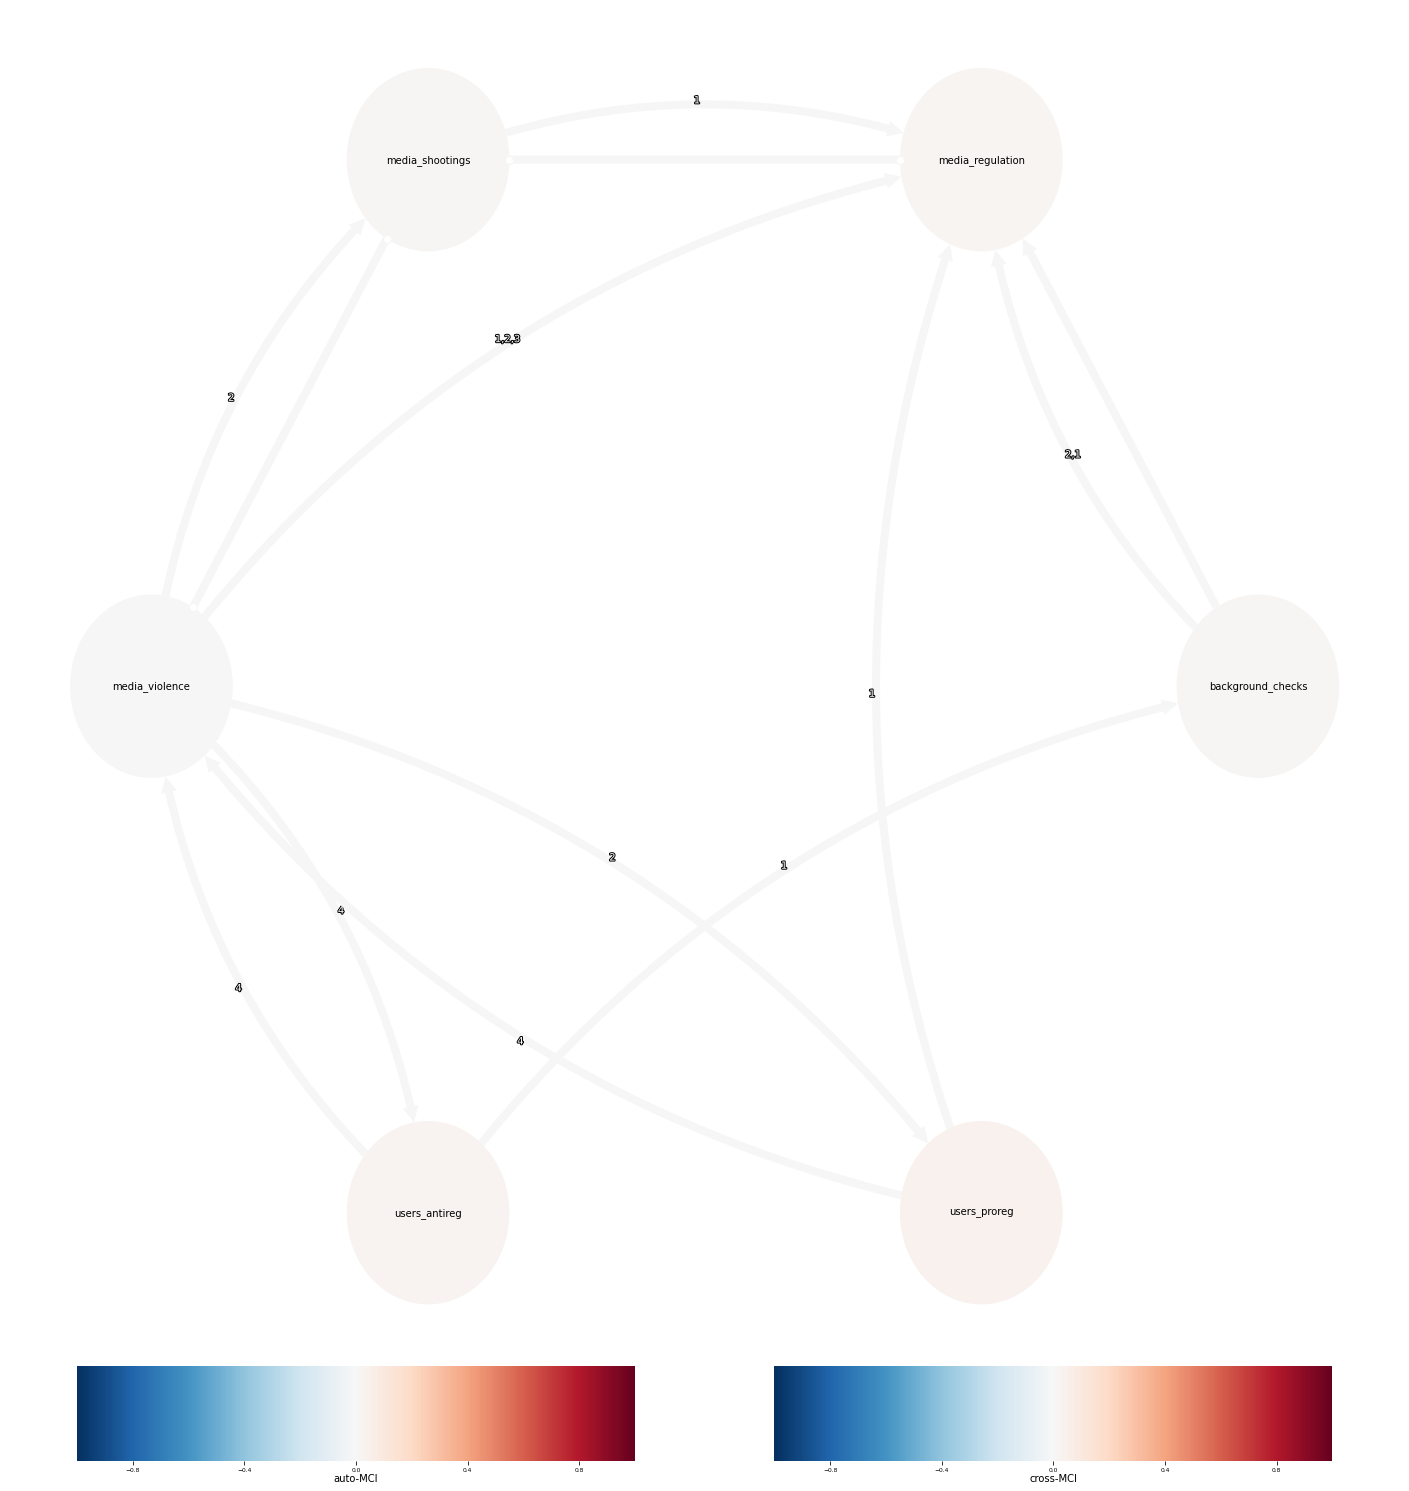

In [4]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    figsize=(25,25),
    )
plt.show()